In [138]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', None)


In [140]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


I want to know if previous outcomes have an effect on current outcomes. I'm looking to see a percentage of yes and and no values grouped by previous outcomes.

In [47]:
df.groupby(['poutcome', 'y']).mean()#Nice to see but doesn't give the output that I'm looking for

age    duration  campaign       pdays  previous  \
poutcome    y                                                            
failure     no   39.626817  211.764464  2.028517  980.291198  1.139841   
            yes  41.871074  467.224793  1.864463  879.682645  1.342149   
nonexistent no   39.935167  221.565850  2.710567  999.000000  0.000000   
            yes  40.173193  623.688634  2.184973  999.000000  0.000000   
success     no   40.453027  241.175365  1.991649    5.624217  1.421712   
            yes  42.864653  363.680089  1.710291    5.568233  1.648770   

                 emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
poutcome    y                                                             
failure     no      -1.611489       93.052742     -43.337209   1.740383   
            yes     -2.131240       93.158255     -39.002645   1.112688   
nonexistent no       0.491993       93.672219     -40.300904   4.083050   
            yes     -0.808946       93.372055     -40.506304   2.669357   
success     no      -2.042589       93.165113     -39.477662   1.199499   
            yes     -2.117338       93.425035     -37.805034   0.887831   

                 nr.employed  
poutcome    y                 
failure     no   5099.794132  
            yes  5049.159504  
nonexistent no   5186.565289  
            yes  5125.858007  
success     no   5053.795198  
            yes  5018.206600

In [22]:
x = df.poutcome.value_counts()
j = df.groupby(['poutcome', 'y']).size()
print(x)
print(j)
plt()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      no       479
             yes      894
dtype: int64


TypeError: 'module' object is not callable

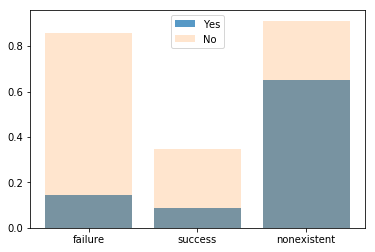

In [113]:
prev_outcome = ['failure', 'success', 'nonexistent']
yes = [605/4252, 3141/35563, 894/1373]
no = [3647/4252, 479/1373, 32422/35563]

# plt.xlabel('Previous Campaign Outcome')
# plt.ylabel('Percentage of Current Campaign Outcome')
plt.bar(prev_outcome, yes, alpha = .75, label ='Yes')
plt.bar(prev_outcome, no, alpha = .2, label = 'No')
plt.legend()

In [146]:
df.groupby(['education','y']).mean()

age    duration  campaign       pdays  \
education           y                                                  
basic.4y            no   46.383138  232.696638  2.669691  987.081910   
                    yes  58.221963  546.200935  1.995327  778.507009   
basic.6y            no   40.462928  222.808935  2.596008  990.036122   
                    yes  40.292553  730.042553  2.111702  872.170213   
basic.9y            no   39.071249  227.013460  2.564609  987.783740   
                    yes  38.942918  665.095137  2.152220  877.228330   
high.school         no   38.058345  222.932933  2.635549  984.135431   
                    yes  37.503395  573.205626  2.017459  801.614937   
illiterate          no   47.571429  243.071429  2.357143  999.000000   
                    yes  51.750000  394.750000  2.000000  750.750000   
professional.course no   39.958262  215.589716  2.657272  985.117040   
                    yes  41.031933  541.132773  2.030252  770.541176   
university.degree   no   38.916460  213.126119  2.643170  979.791675   
                    yes  38.644910  505.283832  2.062874  775.894012   
unknown             no   43.356081  223.888514  2.691892  981.605405   
                    yes  44.219124  489.414343  2.031873  714.199203   

                         previous  emp.var.rate  cons.price.idx  \
education           y                                             
basic.4y            no   0.105923      0.392209       93.691587   
                    yes  0.507009     -1.327804       93.366888   
basic.6y            no   0.113118      0.314829       93.669722   
                    yes  0.308511     -0.705319       93.430037   
basic.9y            no   0.125987      0.232627       93.641024   
                    yes  0.323467     -0.705285       93.415770   
high.school         no   0.152405      0.181388       93.611098   
                    yes  0.461688     -1.188652       93.368916   
illiterate          no   0.071429      0.378571       93.502500   
                    yes  0.250000     -1.925000       92.669250   
professional.course no   0.118546      0.351635       93.594249   
                    yes  0.510924     -1.222353       93.379370   
university.degree   no   0.138217      0.190331       93.523251   
                    yes  0.532934     -1.401138       93.306234   
unknown             no   0.138514      0.331486       93.707033   
                    yes  0.745020     -1.547012       93.373120   

                         cons.conf.idx  euribor3m  nr.employed  
education           y                                           
basic.4y            no      -40.379909   3.953438  5179.739915  
                    yes     -39.013551   1.985743  5085.925935  
basic.6y            no      -41.134981   3.865894  5178.778137  
                    yes     -41.048404   2.732670  5129.279787  
basic.9y            no      -41.362222   3.780350  5175.929935  
                    yes     -40.908879   2.727438  5129.462368  
high.school         no      -41.051933   3.724866  5173.198385  
                    yes     -40.024830   2.167868  5097.487682  
illiterate          no      -40.514286   4.006786  5188.907143  
                    yes     -37.975000   1.800750  5111.825000  
professional.course no      -40.148021   3.918667  5180.360198  
                    yes     -39.937311   2.083970  5090.443025  
university.degree   no      -40.049848   3.778245  5175.230320  
                    yes     -39.510359   1.967023  5087.766287  
unknown             no      -40.088649   3.885882  5174.661486  
                    yes     -38.634661   1.714996  5070.443028

age  duration  campaign     pdays  previous  \
education   y                                                      
high.school no   1458674   8071436     96234  35967394      4838   
            yes   189837   2566807      9520   3675045      2286   

                 emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  \
education   y                                                              
high.school no         9095.9    3.421030e+06     -1483596.5  139302.379   
            yes       -5723.2    4.331644e+05      -184624.6    9851.347   

                  nr.employed  
education   y                  
high.school no   1.891785e+08  
            yes  2.364134e+07

Null Hypothesis:
This marketing campaign was equally successful with both college educated and highschool educated prospects.

In measuring the success of this campaign, the proportion of success for customers with a high school education and a college education are equal.

Alternate Hypothesis:
This campaign was more successful for one group over another.


In [156]:
# # using statsmodels
# count{int, array_like}
# the number of successes in nobs trials. If this is array_like, 
# then the assumption is that this represents the number of successes for 
# each independent sample
# nobs{int, array_like}
# the number of trials or observations, with the same length as count.

high_school_total = df.loc[df['education']=='high.school'] #total number of customers with highschool education
college_total = df.loc[df['education']=='university.degree'] #total number of customers with college level education
high_school_y = high_school_total.loc[high_school_total['y']=='yes']# number of sign ups for people with highschool education
college_y = college_total.loc[college_total['y'] == 'yes'] #number of sign ups for people with college education



from statsmodels.stats.proportion 
import proportions_ztest
count = np.array([len(college_y), len(highschool_y)])
nobs = np.array([len(college_total), len(high_school_total)])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 6.392754392508445 
 p-value = 1.629238494638004e-10


With This P value, we can reject the null hypothesis that the proportions are equal.

**Measuring Effect Size**

h =  theta1 −  theta2

theta =   2 arcsine(SQRT(P))

In [172]:
p1 = len(high_school_y)/len(high_school_total)
p2 = len(college_y)/len(college_total)
theta1 = np.arcsin(np.sqrt(p1))
theta2 = np.arcsin(np.sqrt(p2))
cohensh = theta1 - theta2
cohensh

-0.04408270568413658